# <center><b> <em> Feature Engineering </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [187]:
# Read the XLSX file
data = pd.read_csv("data/dataset_silver.csv")

In [188]:
data.head()

,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice,genres
0,"Super Mario Bros, le film",2023-05-04,92,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,7178203.0,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914,['Animation_Comédie_Famille']
1,Les Vengeances de Maître Poutifard,NaN,90,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,421927.0,2.0,2.0,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735,['Comédie_Famille']
2,Des mains en or,2023-07-06,90,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,269253.0,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081,['Comédie']
3,The Covenant,NaN,123,Guy Ritchie,inconnu,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,NaN,3.1,4.1,7.0,NaN,"Lors de sa dernière mission en Afghanistan, le...",6380188,['Action_Guerre_Thriller']
4,"Cléo, Melvil et moi",2023-05-07,73,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,2306.0,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849,['Comédie dramatique']


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             10726 non-null  object 
 1   date              4157 non-null   object 
 2   durée             10726 non-null  int64  
 3   réalisateur       10726 non-null  object 
 4   distributeur      10726 non-null  object 
 5   acteurs           10726 non-null  object 
 6   nationalités      10726 non-null  object 
 7   langue_d_origine  10726 non-null  object 
 8   type_film         10726 non-null  object 
 9   annee_production  10726 non-null  int64  
 10  box_office_total  8819 non-null   float64
 11  note_presse       10726 non-null  float64
 12  note_spectateurs  10726 non-null  float64
 13  nombre_article    10300 non-null  float64
 14  recompenses       4296 non-null   object 
 15  description       9657 non-null   object 
 16  boxoffice         10726 non-null  int64 

In [190]:
data.shape

(10726, 18)

## <font color="green"> || - Missing Data </font>

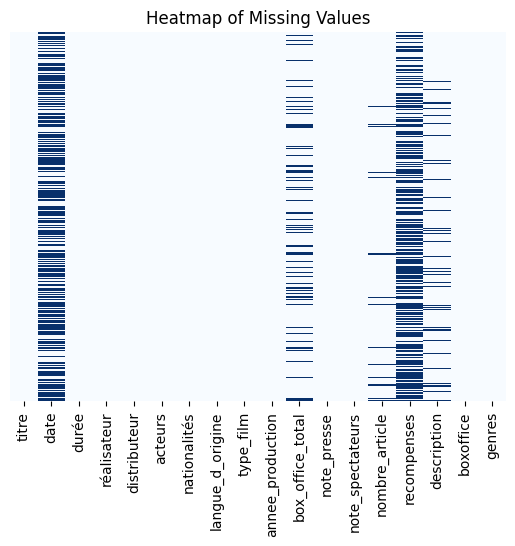

In [191]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [192]:
data.isnull().sum()

titre                  0
date                6569
durée                  0
réalisateur            0
distributeur           0
acteurs                0
nationalités           0
langue_d_origine       0
type_film              0
annee_production       0
box_office_total    1907
note_presse            0
note_spectateurs       0
nombre_article       426
recompenses         6430
description         1069
boxoffice              0
genres                 0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [193]:
data.duplicated().sum()

0

## <font color="green"> IV - Ajout colonnes Awards et Nominations </font>

In [194]:
# Extract the number of awards and nominations using regular expressions
data['awards'] = data['recompenses'].apply(lambda x: int(re.search(r'(\d+) prix', str(x)).group(1)) if re.search(r'(\d+) prix', str(x)) else 0)
data['nominations'] = data['recompenses'].apply(lambda x: int(re.search(r'(\d+) nominations', str(x)).group(1)) if re.search(r'(\d+) nominations', str(x)) else 0)

In [195]:
# Drop the 'recompenses' column if no longer needed
data.drop(columns=['recompenses'], inplace=True)

In [196]:
data.head()

,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,description,boxoffice,genres,awards,nominations
0,"Super Mario Bros, le film",2023-05-04,92,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,7178203.0,3.1,4.1,1022.0,Alors qu’ils tentent de réparer une canalisati...,1866914,['Animation_Comédie_Famille'],0,0
1,Les Vengeances de Maître Poutifard,NaN,90,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,421927.0,2.0,2.0,5.0,"Instituteur à la retraite, Robert Poutifard n'...",180735,['Comédie_Famille'],0,0
2,Des mains en or,2023-07-06,90,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,269253.0,2.2,3.4,6.0,"François, futur académicien, est un écrivain c...",109081,['Comédie'],0,0
3,The Covenant,NaN,123,Guy Ritchie,inconnu,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,NaN,3.1,4.1,7.0,"Lors de sa dernière mission en Afghanistan, le...",6380188,['Action_Guerre_Thriller'],0,0
4,"Cléo, Melvil et moi",2023-05-07,73,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,2306.0,3.3,3.2,12.0,"Dans le Paris désert du premier confinement, A...",1849,['Comédie dramatique'],0,0


## <font color="green"> V - Ajout colonnes nombre Acteurs Connus </font>

In [197]:

# # Charger le fichier "top_acteur.csv" contenant les acteurs connus dans un DataFrame
df_acteurs_connus = pd.read_csv('data/top_acteurs.csv')

In [198]:
# Créer un ensemble dans noms des acteurs connus à partir de la base de données des top acteurs
acteurs_connus = set(df_acteurs_connus['acteur'])

# Compter le nombre d'acteurs connus dans chaque film et créer une nouvelle colonne pour cela
data['nombre_acteurs_connus'] = data['acteurs'].apply(lambda x: len([acteur for acteur in eval(x) if acteur in acteurs_connus]))

# Ajouter une colonne contenant les acteurs connus dans chaque film
data['acteurs_connus'] = data['acteurs'].apply(lambda x: [acteur for acteur in eval(x) if acteur in acteurs_connus])


## <font color="green"> VI - Ajout colonnes Réalisateur Connus </font>

In [199]:

# Check if "Quentin Tarantino" exists in the 'réalisateur' column
if data['réalisateur'].str.contains('Quentin Tarantino', case=False).any():
    print("Quentin Tarantino exists in the 'réalisateur' column.")
else:
    print("Quentin Tarantino does not exist in the 'réalisateur' column.")

Quentin Tarantino exists in the 'réalisateur' column.


In [200]:
# Créer un ensemble des noms des acteurs connus à partir de la base de données des top acteurs
acteurs_connus = set(df_acteurs_connus['acteur'])

# Créer une nouvelle colonne dans le DataFrame 'data' pour indiquer la présence dans le CSV
data['realisateur_connu'] = data['réalisateur'].isin(acteurs_connus)

# Convertir les valeurs True/False en 1/0 dans la colonne 'realisateur_connu'
data['realisateur_connu'] = data['realisateur_connu'].astype(int)




data.head()

,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,...,note_spectateurs,nombre_article,description,boxoffice,genres,awards,nominations,nombre_acteurs_connus,acteurs_connus,realisateur_connu
0,"Super Mario Bros, le film",2023-05-04,92,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,...,4.1,1022.0,Alors qu’ils tentent de réparer une canalisati...,1866914,['Animation_Comédie_Famille'],0,0,1,[Chris Pratt],0
1,Les Vengeances de Maître Poutifard,NaN,90,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,...,2.0,5.0,"Instituteur à la retraite, Robert Poutifard n'...",180735,['Comédie_Famille'],0,0,1,[Christian Clavier],0
2,Des mains en or,2023-07-06,90,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,...,3.4,6.0,"François, futur académicien, est un écrivain c...",109081,['Comédie'],0,0,2,"[Lambert Wilson, Josiane Balasko]",0
3,The Covenant,NaN,123,Guy Ritchie,inconnu,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,...,4.1,7.0,"Lors de sa dernière mission en Afghanistan, le...",6380188,['Action_Guerre_Thriller'],0,0,1,[Jake Gyllenhaal],1
4,"Cléo, Melvil et moi",2023-05-07,73,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,...,3.2,12.0,"Dans le Paris désert du premier confinement, A...",1849,['Comédie dramatique'],0,0,0,[],0


In [201]:
data['genres'] = data['genres'].str.replace("[\[\]']", "", regex=True)
data

,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,...,note_spectateurs,nombre_article,description,boxoffice,genres,awards,nominations,nombre_acteurs_connus,acteurs_connus,realisateur_connu
0,"Super Mario Bros, le film",2023-05-04,92,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,...,4.100000,1022.0,Alors qu’ils tentent de réparer une canalisati...,1866914,Animation_Comédie_Famille,0,0,1,[Chris Pratt],0
1,Les Vengeances de Maître Poutifard,NaN,90,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,...,2.000000,5.0,"Instituteur à la retraite, Robert Poutifard n'...",180735,Comédie_Famille,0,0,1,[Christian Clavier],0
2,Des mains en or,2023-07-06,90,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,...,3.400000,6.0,"François, futur académicien, est un écrivain c...",109081,Comédie,0,0,2,"[Lambert Wilson, Josiane Balasko]",0
3,The Covenant,NaN,123,Guy Ritchie,inconnu,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,...,4.100000,7.0,"Lors de sa dernière mission en Afghanistan, le...",6380188,Action_Guerre_Thriller,0,0,1,[Jake Gyllenhaal],1
4,"Cléo, Melvil et moi",2023-05-07,73,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,...,3.200000,12.0,"Dans le Paris désert du premier confinement, A...",1849,Comédie dramatique,0,0,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,La Mujer de mi hermano,NaN,89,Ricardo de Montreuil,inconnu,"['Bárbara Mori', 'Christian Meier', 'Manolo Ca...",Argentine,['Espagnol'],Long-métrage,2005,...,3.012915,NaN,"La monotonie gagne le couple de Zoe, jeune fem...",1018750,Drame,0,0,0,[],0
10722,Gracie,NaN,97,Davis Guggenheim,inconnu,"['Carly Schroeder', 'Dermot Mulroney', 'Jesse ...",U.S.A.,['Anglais'],Long-métrage,2007,...,3.012915,NaN,"En 1978, une adolescente dont le frère, as du ...",1355904,Drame,0,0,0,[],0
10723,Keeping up with the Steins,NaN,99,Scott Marshall,inconnu,"['Jami Gertz', 'Daryl Hannah', 'Garry Marshall']",U.S.A.,['Anglais'],Long-métrage,2006,...,3.012915,1.0,"Benjamin, un jeune garçon juif de 13 ans est s...",653723,Comédie,0,0,0,[],0
10724,Impractical Jokers: The Movie,NaN,93,Chris Henchy,inconnu,"['Brian Quinn', 'Joe Gatto', 'Sal Vulcano']",U.S.A.,['Anglais'],Long-métrage,2020,...,3.012915,NaN,"Quatre amis, Joe, Q, Murr et Sal, alias les Jo...",3545000,Comédie,0,0,0,[],0


In [203]:
# Assuming you have already split the 'genre' column by underscores to get individual genre names
data['genres'] = data['genres'].str.split('_')

# Get a set of all unique genres
unique_genres = set(g for row in data['genres'] for g in row)

# Create binary columns for each unique genre
for genre in unique_genres:
    data[genre] = data['genres'].apply(lambda x: 1 if genre in x else 0)

data


,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,...,Epouvante-horreur,Drame,Comédie,Drama,Judiciaire,Arts Martiaux,Action,Divers,Western,Animation
0,"Super Mario Bros, le film",2023-05-04,92,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,...,0,0,1,0,0,0,0,0,0,1
1,Les Vengeances de Maître Poutifard,NaN,90,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,...,0,0,1,0,0,0,0,0,0,0
2,Des mains en or,2023-07-06,90,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,...,0,0,1,0,0,0,0,0,0,0
3,The Covenant,NaN,123,Guy Ritchie,inconnu,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,...,0,0,0,0,0,0,1,0,0,0
4,"Cléo, Melvil et moi",2023-05-07,73,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,La Mujer de mi hermano,NaN,89,Ricardo de Montreuil,inconnu,"['Bárbara Mori', 'Christian Meier', 'Manolo Ca...",Argentine,['Espagnol'],Long-métrage,2005,...,0,1,0,0,0,0,0,0,0,0
10722,Gracie,NaN,97,Davis Guggenheim,inconnu,"['Carly Schroeder', 'Dermot Mulroney', 'Jesse ...",U.S.A.,['Anglais'],Long-métrage,2007,...,0,1,0,0,0,0,0,0,0,0
10723,Keeping up with the Steins,NaN,99,Scott Marshall,inconnu,"['Jami Gertz', 'Daryl Hannah', 'Garry Marshall']",U.S.A.,['Anglais'],Long-métrage,2006,...,0,0,1,0,0,0,0,0,0,0
10724,Impractical Jokers: The Movie,NaN,93,Chris Henchy,inconnu,"['Brian Quinn', 'Joe Gatto', 'Sal Vulcano']",U.S.A.,['Anglais'],Long-métrage,2020,...,0,0,1,0,0,0,0,0,0,0


In [204]:
data.columns

Index(['titre', 'date', 'durée', 'réalisateur', 'distributeur', 'acteurs',
       'nationalités', 'langue_d_origine', 'type_film', 'annee_production',
       'box_office_total', 'note_presse', 'note_spectateurs', 'nombre_article',
       'description', 'boxoffice', 'genres', 'awards', 'nominations',
       'nombre_acteurs_connus', 'acteurs_connus', 'realisateur_connu',
       'Famille', 'Bollywood', 'Thriller', 'Sport event', 'Comédie dramatique',
       'Erotique', 'Policier', 'Espionnage', 'Expérimental', 'Musical',
       'Comédie musicale', 'Science fiction', 'Péplum', 'Guerre', 'Romance',
       'Fantastique', 'Biopic', 'Historique', 'Aventure', 'Epouvante-horreur',
       'Drame', 'Comédie', 'Drama', 'Judiciaire', 'Arts Martiaux', 'Action',
       'Divers', 'Western', 'Animation'],
      dtype='object')

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   titre                  10726 non-null  object 
 1   date                   4157 non-null   object 
 2   durée                  10726 non-null  int64  
 3   réalisateur            10726 non-null  object 
 4   distributeur           10726 non-null  object 
 5   acteurs                10726 non-null  object 
 6   nationalités           10726 non-null  object 
 7   langue_d_origine       10726 non-null  object 
 8   type_film              10726 non-null  object 
 9   annee_production       10726 non-null  int64  
 10  box_office_total       8819 non-null   float64
 11  note_presse            10726 non-null  float64
 12  note_spectateurs       10726 non-null  float64
 13  nombre_article         10300 non-null  float64
 14  description            9657 non-null   object 
 15  bo

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   titre                  10726 non-null  object 
 1   date                   4157 non-null   object 
 2   durée                  10726 non-null  int64  
 3   réalisateur            10726 non-null  object 
 4   distributeur           10726 non-null  object 
 5   acteurs                10726 non-null  object 
 6   nationalités           10726 non-null  object 
 7   langue_d_origine       10726 non-null  object 
 8   type_film              10726 non-null  object 
 9   annee_production       10726 non-null  int64  
 10  box_office_total       8819 non-null   float64
 11  note_presse            10726 non-null  float64
 12  note_spectateurs       10726 non-null  float64
 13  nombre_article         10300 non-null  float64
 14  description            9657 non-null   object 
 15  bo

## <font color="green"> VI- Export gold Data </font>

In [206]:
#EXporter la data dans un Csv 
data.to_csv('data/dataset_gold.csv', index=False)
data.to_csv('../Modeling/dataset_gold.csv', index=False)